In [1]:
from keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test) = load_data()

/Users/rohit/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


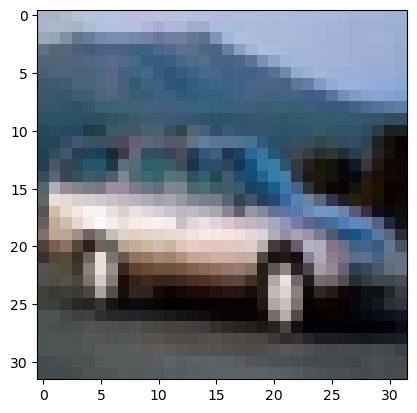

In [2]:
plt.imshow(x_train[4])

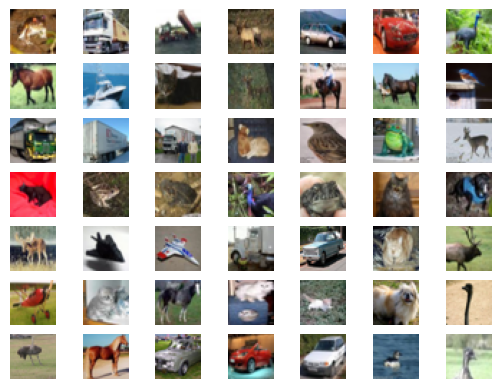

In [3]:
for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x_train[i])

plt.show()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,LeakyReLU,Dropout
from keras.optimizers import Adam
import numpy as np
from keras.utils import plot_model

In [6]:

def descriminator(in_shape = (32,32,3)):

  model = Sequential()

  model.add(Conv2D(64,(3,3),padding= "same" , input_shape = in_shape))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(128,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(256,(3,3),padding= "same" , strides=(2,2)))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1,activation='sigmoid'))

  opt = Adam(lr=0.0002,beta_1=0.5)

  model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

  return model

In [7]:
model = descriminator()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         2

In [8]:
def load_real_sample():

  (x_train,_),(_,_) = load_data()

  x = x_train.astype('float32')

    
  x = (x-127.5)/127.5

  return x

In [9]:
x = load_real_sample()
x.shape

(50000, 32, 32, 3)

In [10]:
def generate_real_sample(dataset,n_sample):

  ix = np.random.randint(0,dataset.shape[0],n_sample)

  x = dataset[ix]
  y = np.ones((n_sample,1))

  return x,y

In [11]:
def generate_fake_sample(n_sample):

  x = np.random.rand(32 * 32 * 3 * n_sample)
  x = -1 + x * 2
  x = x.reshape((n_sample,32,32,3))

  y = np.zeros((n_sample,1))

  return x,y

In [12]:
x,y = generate_fake_sample(64)

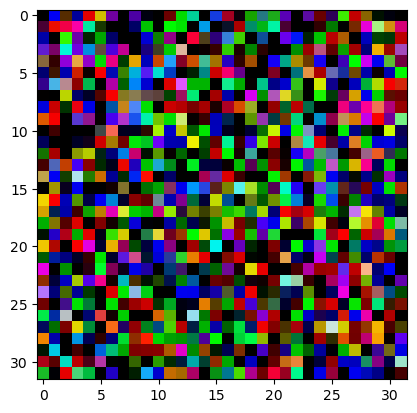

In [13]:
plt.imshow(x[0])

In [14]:
def train_descriminator(model,dataset,n_iter=20,n_batch=128):

  half_batch = n_batch//2

  for i in range(n_iter):

    x_real,y_real = generate_real_sample(dataset,half_batch)

    _,real_acc = model.train_on_batch(x_real,y_real)

    x_fake,y_fake = generate_fake_sample(half_batch)

    _,fake_acc = model.train_on_batch(x_fake,y_fake)

    print(f'{i+1} . real = {real_acc * 100}% , fake = {fake_acc * 100}% ')

In [15]:
model = descriminator()

dataset = load_real_sample()

train_descriminator(model,dataset)

1 . real = 23.4375% , fake = 0.0% 
2 . real = 100.0% , fake = 0.0% 
3 . real = 96.875% , fake = 71.875% 
4 . real = 100.0% , fake = 100.0% 
5 . real = 96.875% , fake = 100.0% 
6 . real = 95.3125% , fake = 100.0% 
7 . real = 100.0% , fake = 100.0% 
8 . real = 100.0% , fake = 100.0% 
9 . real = 100.0% , fake = 100.0% 
10 . real = 100.0% , fake = 100.0% 
11 . real = 100.0% , fake = 100.0% 
12 . real = 100.0% , fake = 100.0% 
13 . real = 100.0% , fake = 100.0% 
14 . real = 98.4375% , fake = 100.0% 
15 . real = 100.0% , fake = 100.0% 
16 . real = 100.0% , fake = 100.0% 
17 . real = 100.0% , fake = 100.0% 
18 . real = 100.0% , fake = 100.0% 
19 . real = 100.0% , fake = 100.0% 
20 . real = 100.0% , fake = 100.0% 


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Reshape,Conv2D,Conv2DTranspose,LeakyReLU

In [17]:
def generator(latent_dim):

  model = Sequential()

  n_nodes = 256 * 4 * 4

  model.add(Dense(n_nodes,input_dim = latent_dim))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Reshape((4,4,256)))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2DTranspose(128,(4,4),strides=(2,2),padding = 'same'))
  model.add(LeakyReLU(alpha=0.2))

  model.add(Conv2D(3,(3,3),activation='tanh',padding='same'))

  return model

In [18]:
model1 = generator(100)

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 4096)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 128)         524416    
 anspose)                                                        
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 16, 16, 128)       262272    
 Transpose)                                           

In [19]:
def generate_latent_points(latent_dim,n_sample):

  x_input = np.random.randn(latent_dim * n_sample)
  x_input = x_input.reshape(n_sample,latent_dim)

  return x_input

In [20]:
def generate_fake_sample_by_generator(g_model,latent_dim,n_sample):

  x_input = generate_latent_points(latent_dim,n_sample)

  x = g_model.predict(x_input)

  y = np.zeros((n_sample,1))

  return x,y

2/2 [==============================] - 0s 21ms/step


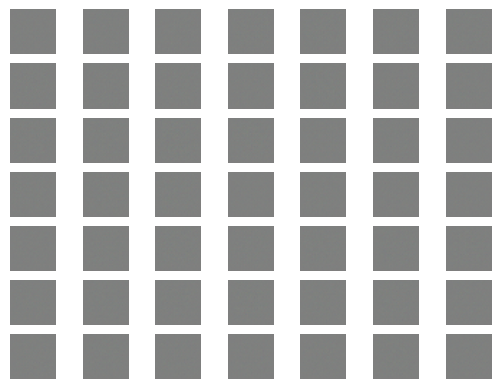

In [21]:
model = generator(100)

x,y = generate_fake_sample_by_generator(model,100,49)

x = (x+1)/2.0

for i in range(49):

  plt.subplot(7,7,1+i)

  plt.axis('off')

  plt.imshow(x[i])

plt.show()

In [22]:
def gan(g_model,d_model):

  d_model.trainable = False

  model = Sequential()

  model.add(g_model)

  model.add(d_model)

  opt = Adam(lr = 0.0002,beta_1 = 0.5)

  model.compile(optimizer = opt,loss = 'binary_crossentropy')

  return model

In [23]:
d_model = descriminator()

g_model = generator(100)

model = gan(g_model,d_model)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 32, 32, 3)         1466115   
                                                                 
 sequential_4 (Sequential)   (None, 1)                 522497    
                                                                 
Total params: 1988612 (7.59 MB)
Trainable params: 1466115 (5.59 MB)
Non-trainable params: 522497 (1.99 MB)
_________________________________________________________________


In [24]:
def train(g_model,d_model,gan_model,dataset,latent_dim,n_epochs=20,n_batch=128):

  batch_per_epoch = dataset.shape[0]//n_batch
  half_batch = n_batch//2

  for i in range(n_epochs):
    for j in range(batch_per_epoch):

      x_real,y_real = generate_real_sample(dataset,half_batch)

      d_loss1,_ = d_model.train_on_batch(x_real,y_real)

      x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,half_batch)

      d_loss2,_ = d_model.train_on_batch(x_fake,y_fake)

      x_gan = generate_latent_points(latent_dim,n_batch)

      y_gan = np.ones((n_batch,1))

      g_loss = gan_model.train_on_batch(x_gan,y_gan)

      print(f'{i+1}. {j+1}/{batch_per_epoch} : d1 = {d_loss1} , d2 = {d_loss2} , g = {g_loss}')

    if (i+1)%10 == 0:
      summerize_function(i,g_model,d_model,dataset,latent_dim)


In [25]:
def summerize_function(i,g_model,d_model,dataset,latent_dim,n_samples = 150):

  x_real,y_real = generate_real_sample(dataset,n_samples)

  _,acc_real = d_model.evaluate(x_real,y_real)

  x_fake,y_fake = generate_fake_sample_by_generator(g_model,latent_dim,n_samples)

  _,acc_fake = d_model.evaluate(x_fake,y_fake)

  print(f'Descriminator Accuracy: Real = {acc_real} , Fake = {acc_fake}')

  save_plot(x_fake,i)

  filename = 'generator_model_%03d.h5' % (i+1)
  g_model.save(filename)

In [26]:
def save_plot(example,epoch,n=7):

  example = (example + 1)/2.0

  for i in range(n * n):
    plt.subplot(n,n,i+1)

    plt.axis('off')

    plt.imshow(example[i])

  filename = 'generated_plot_e%03d.png' % (epoch+1)

  plt.savefig(filename)
  plt.close()

In [27]:
d_model = descriminator()

g_model = generator(100)

gan_model = gan(g_model,d_model)



In [ ]:
train(g_model,d_model,gan_model,dataset,latent_dim=100,n_epochs=200,n_batch=128)

2/2 [==============================] - 0s 34ms/step
1. 1/390 : d1 = 0.6797290444374084 , d2 = 0.7129091620445251 , g = 0.6882097721099854
2/2 [==============================] - 0s 35ms/step
1. 2/390 : d1 = 0.3856695592403412 , d2 = 0.8689724802970886 , g = 0.6331989169120789
2/2 [==============================] - 0s 36ms/step
1. 3/390 : d1 = 0.11328195780515671 , d2 = 1.6099750995635986 , g = 0.6804172992706299
2/2 [==============================] - 0s 35ms/step
1. 4/390 : d1 = 0.1784045696258545 , d2 = 0.6142511367797852 , g = 1.3061823844909668
2/2 [==============================] - 0s 36ms/step
1. 5/390 : d1 = 0.26647454500198364 , d2 = 0.5310090780258179 , g = 1.0816025733947754
2/2 [==============================] - 0s 36ms/step
1. 6/390 : d1 = 0.08353888243436813 , d2 = 0.6210273504257202 , g = 0.8139729499816895
2/2 [==============================] - 0s 36ms/step
1. 7/390 : d1 = 0.024874189868569374 , d2 = 0.6650992631912231 , g = 0.8019771575927734
2/2 [========================

2/2 [==============================] - 0s 37ms/step
1. 60/390 : d1 = 0.6365551948547363 , d2 = 0.5414589047431946 , g = 1.5530478954315186
2/2 [==============================] - 0s 35ms/step
1. 61/390 : d1 = 0.6594942212104797 , d2 = 0.5095824003219604 , g = 1.5599608421325684
2/2 [==============================] - 0s 36ms/step
1. 62/390 : d1 = 0.6297487020492554 , d2 = 0.43742451071739197 , g = 2.038645029067993
2/2 [==============================] - 0s 35ms/step
1. 63/390 : d1 = 0.6399499177932739 , d2 = 0.3559120297431946 , g = 1.85128653049469
2/2 [==============================] - 0s 36ms/step
1. 64/390 : d1 = 0.7073171138763428 , d2 = 0.48197269439697266 , g = 1.6144704818725586
2/2 [==============================] - 0s 36ms/step
1. 65/390 : d1 = 0.6702698469161987 , d2 = 0.602120041847229 , g = 1.404641032218933
2/2 [==============================] - 0s 36ms/step
1. 66/390 : d1 = 0.6125523447990417 , d2 = 0.5420621037483215 , g = 1.5939974784851074
2/2 [=========================

2/2 [==============================] - 0s 38ms/step
1. 119/390 : d1 = 0.4126476049423218 , d2 = 0.3448033332824707 , g = 2.8245482444763184
2/2 [==============================] - 0s 39ms/step
1. 120/390 : d1 = 0.29611632227897644 , d2 = 0.21437203884124756 , g = 2.9499783515930176
2/2 [==============================] - 0s 38ms/step
1. 121/390 : d1 = 0.40644171833992004 , d2 = 0.6039078235626221 , g = 2.552517890930176
2/2 [==============================] - 0s 38ms/step
1. 122/390 : d1 = 0.5119014978408813 , d2 = 0.5642586946487427 , g = 2.784918785095215
2/2 [==============================] - 0s 38ms/step
1. 123/390 : d1 = 0.4635780453681946 , d2 = 0.6451696753501892 , g = 2.902287006378174
2/2 [==============================] - 0s 39ms/step
1. 124/390 : d1 = 0.5702016353607178 , d2 = 0.4905640482902527 , g = 3.923246383666992
2/2 [==============================] - 0s 37ms/step
1. 125/390 : d1 = 0.42705801129341125 , d2 = 0.31247052550315857 , g = 2.9037585258483887
2/2 [==============

2/2 [==============================] - 0s 37ms/step
1. 178/390 : d1 = 0.6777215003967285 , d2 = 0.4416196048259735 , g = 3.6539087295532227
2/2 [==============================] - 0s 40ms/step
1. 179/390 : d1 = 0.5142602920532227 , d2 = 0.450305700302124 , g = 3.056373119354248
2/2 [==============================] - 0s 39ms/step
1. 180/390 : d1 = 0.4810764491558075 , d2 = 0.7112858295440674 , g = 3.105638027191162
2/2 [==============================] - 0s 38ms/step
1. 181/390 : d1 = 0.5465641021728516 , d2 = 0.25257888436317444 , g = 2.4858012199401855
2/2 [==============================] - 0s 37ms/step
1. 182/390 : d1 = 0.5848017334938049 , d2 = 0.8964033722877502 , g = 2.5084152221679688
2/2 [==============================] - 0s 37ms/step
1. 183/390 : d1 = 1.045515775680542 , d2 = 0.4420366883277893 , g = 1.711155891418457
2/2 [==============================] - 0s 37ms/step
1. 184/390 : d1 = 0.5330498814582825 , d2 = 0.43327781558036804 , g = 1.811380386352539
2/2 [===================

2/2 [==============================] - 0s 39ms/step
1. 237/390 : d1 = 0.6412951946258545 , d2 = 0.8058493137359619 , g = 1.6951818466186523
2/2 [==============================] - 0s 39ms/step
1. 238/390 : d1 = 0.502868115901947 , d2 = 0.37799072265625 , g = 1.9712294340133667
2/2 [==============================] - 0s 39ms/step
1. 239/390 : d1 = 0.5752943158149719 , d2 = 0.5527169704437256 , g = 1.8514094352722168
2/2 [==============================] - 0s 43ms/step
1. 240/390 : d1 = 0.6003933548927307 , d2 = 0.6974872350692749 , g = 2.0214173793792725
2/2 [==============================] - 0s 42ms/step
1. 241/390 : d1 = 0.6578044891357422 , d2 = 0.3898012638092041 , g = 1.931469202041626
2/2 [==============================] - 0s 41ms/step
1. 242/390 : d1 = 0.7606934309005737 , d2 = 0.7668169736862183 , g = 1.5966376066207886
2/2 [==============================] - 0s 44ms/step
1. 243/390 : d1 = 0.5989230871200562 , d2 = 0.4774743318557739 , g = 1.5171630382537842
2/2 [===================